<a href="https://colab.research.google.com/github/vitorquintella/personal-ml-study/blob/main/Caderno_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumo
Disclaimer: Baseado nas aulas do Let's Code 04/03/2022

[Documentação SKlearn oficial](https://scikit-learn.org/stable/modules/feature_selection.html)


A Feature Selection é tentativa de minimizar o número de variáveis de entrada do nosso modelo.  
A seleção de recursos é independente de qualquer algoritmo de aprendizado de máquina. 
  
Buscando em geral:
- Reduz o custo computacional
- Em geral, melhora o desempenho em produção
- Facilita a interpretação do modelo
- Reduz a complexidade do modelo, tornando menos imprevisível com menos variáveis
- Reduz o Variance 
- Evita o overfitting, tornamos o modelo mais generalista (A capacidade de fazer previsões bem sucedidas com dados não observados)
- Reduz a influência dos ruidos
  
Basicamente existem alguns tipos:
- Baseada em Filtros 
- Baseada em Wrapper (Estrutura que cobre, embrulho)
- Embutidos - Embedded (filtro + wrapper)

# Quick Snippet

In [44]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

X, y = load_iris(return_X_y=True)
print(X.shape)

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(150, 4)
(150, 3)


# Baseada em Filtros
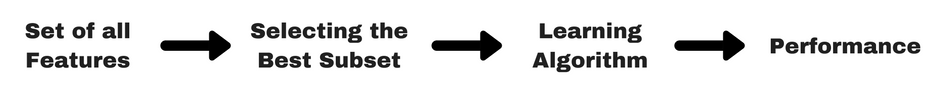

Se baseia no processo de escolha de features para definir quais variáveis são adequadas na previsão.
- Muitos casos são resolvidos apenas por isso.
- Posso remover variáveis que não acrescentem informação?
- Pode ser realizado durante o próprio EDA
- Os métodos de filtro são geralmente usados como uma etapa de pré-processamento.


Cuidado esses métodos não removem colinearidade (dependência ou associação significativa entre as variáveis independentes)  

 A remoção de variáveis independentes apenas com base na correlação pode levar a uma variável preditora valiosa e efetiva, pois a correlação é apenas uma indicação da presença de multicolinearidade.  

Você pode utilizar a Variance inflation factor, basicamente cada variável X é isolada e "finge" ser o y, assim podemos identificar quais variáveis independentes são melhores explicadas pelas outras. Nesse caos poderiamos remover (ou não) features que são altamente dependes, mesmo que não de forma linear.

**Diferentes opções:** 

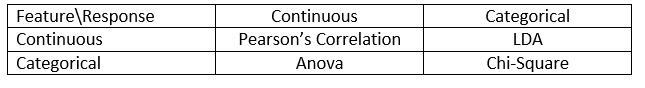

- Pearson: Correlação de Pearson, dependência Linear entre duas variáveis, claro que uma delas é nosso y
- LDA: Análise Discriminante Linear, combinação linear de features que separa ou representa duas ou mais classes
- Análise de variância: distâncias para indicar o quanto longe estamos do y
- Qui-Quadrado: probabilidade de correlação ou associação entre elas usando sua distribuição de frequência
- Claro que existem muitos outros métodos que podemos utilizar em cada situação.  

# Baseda em Wrapper
Em resumo, é a famosa força bruta, pois se transforma em um problema de busca... Qual o melhor modelo com menos features possíveis.  
  
Basicamente  com base nas inferências que extraímos do modelo anterior, decidimos adicionar ou remover recursos do seu subconjunto. 
  
Esses métodos geralmente são computacionalmente muito caros.
  
Por isso temos um cenário parecido e soluções parecidas com a idéia de encontrar os melhores hiperparâmetros!!! Lembram?

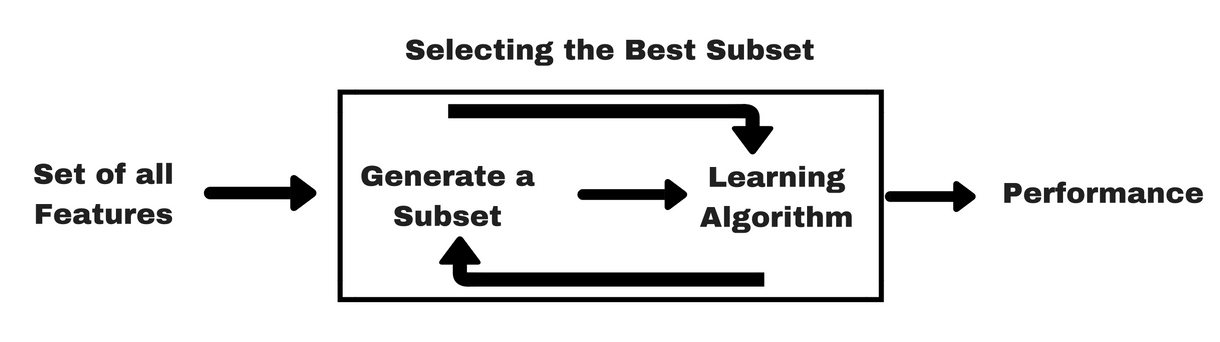

- Seleção Direta (que inclusive tem um método de ordenação com o mesmo nome), vamos adicionando a melhor feature um a um até que pare de melhorar nosso modelo.  
- Backward Elimination, ou Seleção para trás, começamos com todas as features e vamos tirando a menos significante.
- Existem outros...

# Diferenças entre filtro e wrapper:  
  
- Os métodos de filtro medem a relevância dos recursos por sua correlação com a variável dependente, enquanto os métodos wrapper medem a utilidade de um subconjunto de recursos treinando um modelo nele.
- Os métodos de filtro são muito mais rápidos em comparação com os métodos de wrapper, pois não envolvem o treinamento dos modelos. Por outro lado, os métodos wrapper também são computacionalmente muito caros.
- Os métodos de filtro usam métodos estatísticos para avaliação de um subconjunto de recursos, enquanto os métodos de wrapper usam validação cruzada.
- Os métodos de filtro podem falhar em encontrar o melhor subconjunto de recursos em muitas ocasiões, mas os métodos wrapper sempre podem fornecer o melhor subconjunto de recursos.
- **O uso do subconjunto de recursos dos métodos wrapper torna o modelo mais propenso a overfitting** em comparação ao uso do subconjunto de recursos dos métodos de filtro. Uma vez que já escolho os dados baseado no desempenho do modelo.

# Embutidos - Embedded
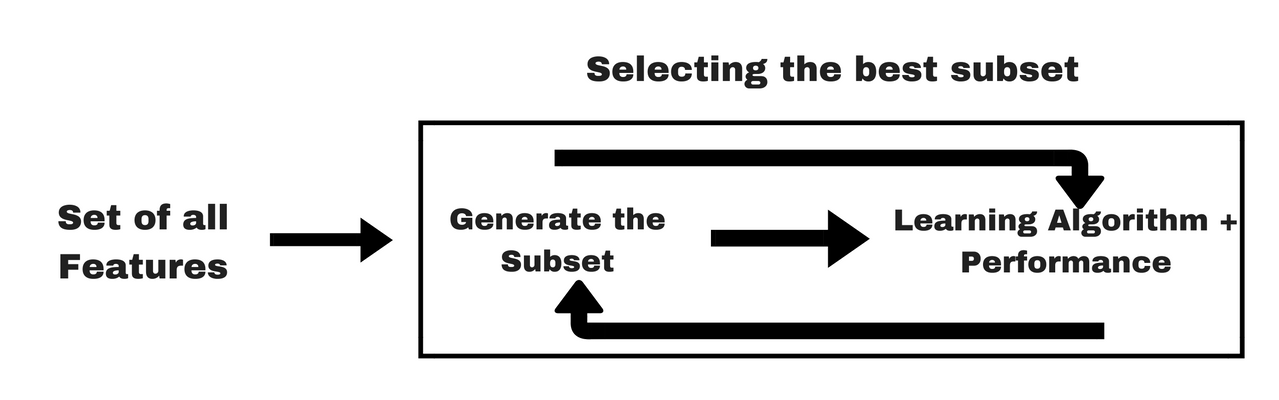

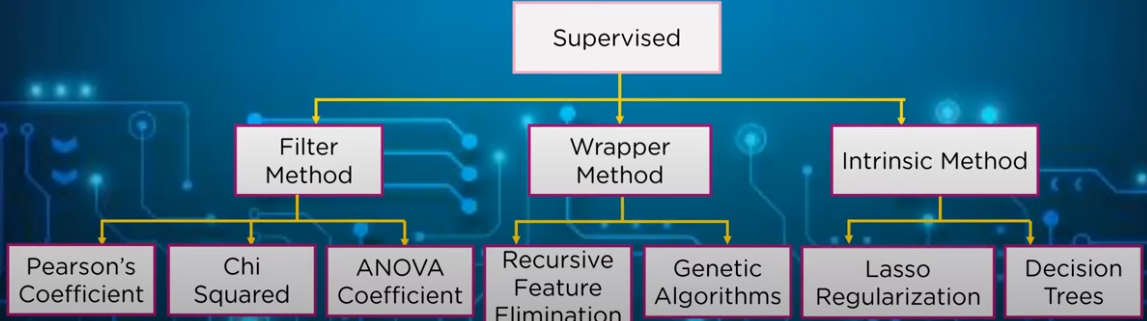

É um combinação de Filtro e Wrapper, um dos exemplos mais populares desses métodos é a regressão LASSO, que possue funções de penalização embutidas para reduzir o overfitting.  
  
### Lasso - Least Absolute Selection and Shrinkage Operator
É um método supervisionado de aprendizagem de máquina.
Na Regressão Lasso, um parâmetro de ajuste chamado lambda é aplicado ao modelo de regressão para controlar a força da penalidade. À medida que o lambda aumenta, mais coeficientes são reduzidos a zero, sendo menos preditores selecionados e há mais encolhimento do coeficiente não nulo.

Algumas vezes uma feature nos "empurram" para ter um overfiting, ou seja, "decorar" os dados. Os dados as vezes podem não condizer com a realidade.Se os dados selecionados para prever diabetes, com muitos jovens e poucos idosos, pode me inclinar a um resultado de que pessoas mais novas tem mais chance de ter diabetes.
   
Na base de pessoas com diabetes, podemos ter limites de idade muito restrito (ex. estudo de diabetes em pessoas mais novas), isso deixa nosso modelo "viciado" e pode ser que não generalize o suficiente para pessoas mais experientes.  
  
Então o ideal é realmente pensar o quanto uma feature é importante e o quanto nosso dataset está equilibrado.
  
Utilizando Lasso temos uma regularizacão, (escolha de features).  
L1 ele coloca a informacão que não são importantes para zero, temos também o L2 que colocar como tendência a zero.   
Enfim o L1 retira as features que não são importantes.
  
https://scikit-learn.org/stable/modules/feature_selection.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html  

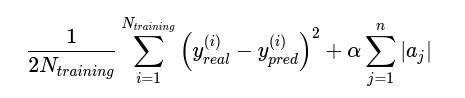

https://www.kaggle.com/prasadperera/the-boston-housing-dataset/data

### a0 Exemplo sem a seleção Lasso

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
%%capture output
from sklearn.datasets import load_boston
# TODO: The Boston housing prices dataset has an ethical problem. Change to California dataset.
boston_dataset = load_boston() 
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV']=boston_dataset.target

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [90]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

r2_score(y_test, y_pred)

0.668759493535632

In [92]:
# Vizualizando as features geradas
model.coef_

array([-1.00213533,  0.69626862,  0.27806485,  0.7187384 , -2.0223194 ,
        3.14523956, -0.17604788, -3.0819076 ,  2.25140666, -1.76701378,
       -2.03775151,  1.12956831, -3.61165842])

### a1 Escolhendo as melhores Features



In [109]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.3, random_state=42)
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
r2_score(y_test, y_pred)

0.6333377363982589

In [110]:
# Nosso modelo de lasso zerou o peso dois features
# A priori eles devem ser não relevantes então.
# Outras diveram apenas uma redução de peso.
# Como o L1 é um hiperparâmetro, outros L1s poderiam zerar mais  ou menos features.

importancia = np.abs(model.coef_)
importancia

array([0.43518339, 0.        , 0.        , 0.55446503, 0.6375321 ,
       3.35282364, 0.        , 1.15124057, 0.        , 0.        ,
       1.64122437, 0.90350004, 3.582704  ])

In [111]:
features = X.columns
features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [112]:
melhores_features = np.array(features)[importancia > 0]
melhores_features = melhores_features.tolist()
melhores_features

['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

## a2 Predizendo com as melhores features

In [113]:
X = df[melhores_features]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

r2_score(y_test, y_pred)

0.6230166483804656

In [114]:
model.coef_

array([-0.60936263,  0.80376912, -1.8843777 ,  3.38078374, -2.55206071,
       -1.93638203,  1.02617125, -3.58054863])

## b0 Tuning: Encontrando o melhor alpha no Lasso

In [115]:
#Testando para todo o X! pode ser considerado data leakage
X = df.drop(columns=['MEDV'])
y = df['MEDV']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [108]:
from sklearn.model_selection import GridSearchCV

espaco_hiperparametros = {
    'alpha': np.arange(0.01, 5, 0.01)
}

model = Lasso()
grid_search = GridSearchCV(model, espaco_hiperparametros, cv=5)
search = grid_search.fit(X_std, y)

print(grid_search.best_params_)

{'alpha': 0.17}


## b1 Encontrar as melhores features com o melhor alpha do Lasso

In [116]:
model = Lasso(alpha=0.17, random_state=42)

In [117]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [118]:
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

features = X.columns
features

importancia = np.abs(model.coef_)
importancia

melhores_features = np.array(features)[importancia > 0]
melhores_features = melhores_features.tolist()
print(melhores_features)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']


## b2 predizendo com as melhores features do melhor alpha

In [120]:
X = df[melhores_features]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)

r2_score(y_test, y_pred)

0.6521583080985494

Como com alpha 0.17 tivemos um melhor desempenho que com o alpha 0.3